# Proyecto de <span style="color:red"> NETFLIX </span> 


    Realizado por Jose Ignacio Pérez España

# <span style="color:gold"> Librerías </span> 

In [130]:
"""Importacion de librerias""" 
#mediante las siglas consensuadas por la comunidad de analistas y cientificos de datos:

import os             #nos permite acceder a funcionalidades dependientes del Sistema Operativo.

import csv #a pesar de que podemos leer los archivos csv con el atributo de pandas importamos csv para luego de reparar nulos guardar el dataframe.

"""Carga, preprocesamiento y procesamiento de datos:"""

import numpy as np   #Atributos matematicos. Conjunto de funciones matematicas esencial para el calculo cientifico y analisis de datos en python. Nota: a pesar de que se incorpora en pandas la importamos.

import pandas as pd  #especializada en el manejo y análisis de estructuras de datos. Incluye funciones para realizar operaciones estadísticas y de agregación en los datos, así como para limpiar y preparar los datos para su análisis.


import requests       # Utilizada para enviar solicitudes HTTP y HTTPS a servidores web. También proporciona funciones para enviar y recibir datos en diferentes formatos, como JSON, XML, entre otros.


"""Visualización de datos:"""

import plotly.express as px           #basada en la liberia plot

import matplotlib.pyplot as plt       #Basada en la liberia mat

import seaborn as sns                 #Basada en matplotlib pero permite mas personalización de los graficos. 

import streamlit as st      #Permite de manera sencilla e integrada desarrollar aplicaciones gracias a la interacción con otras librerías para su empleo.

# <span style="color:gold"> Carga del archivo del conjunto de datos </span> 

In [131]:
"""Importacion de archivos a Python"""

df = pd.read_csv(r"C:\Users\Usuario\Desktop\escritorio\DA-DS\Upgrade Hub\NetFlix.csv")

# <span style="color:gold"> Preprocesamiento y Análisis exploratorio </span> 

    (nota: en los códigos las variables son en minúsculas, sin acentos ni "ñ")
    
    
Primer paso: Metadatos del Conjunto de datos. 

Segundo paso: Reparacion de valores nulos y/o atipicos.

Tercer paso: Analisis descriptivo de las variables

Cuarto paso: Representacion grafica. 

## <span style="color:gold"> Primer paso: Metadatos del conjunto de datos.  </span> 

Se emplean los atributos basicos de pandas

## <span style="color:gold"> Segundo paso: Reparación de valores nulos y/o atípicos </span> 

¿Cuántos nulos y dónde?

In [132]:
df.isnull().sum().sum()   #total de nulos 

3631

In [133]:
#dónde
nulos = df.isnull().sum()   #atributo de pandas para la localizacion de valores nulos. Ademas añadimos el atributo sum para sumar todos los que encuentre en cada variable-columna.
nulos

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

Porcentaje

In [134]:
total_nulos = nulos.sum()
print("el total de nulos del dataset es:",total_nulos, "nulos")
porcentaje_total_nulos= df.isnull().sum()*100/len(df) 
print("el porcentaje de nulos es de:",porcentaje_total_nulos,"%")

el total de nulos del dataset es: 3631 nulos
el porcentaje de nulos es de: show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
genres           0.000000
description      0.000000
dtype: float64 %


Distribución de nulos: Mapa de calor

<AxesSubplot: >

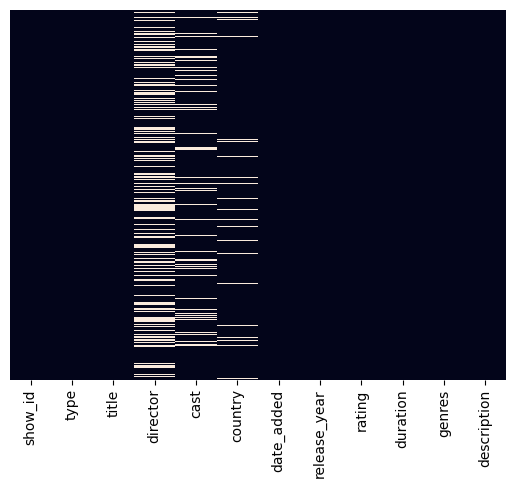

In [135]:
#Aplicamos un mapa de calor ya que son los mas recomendables para visualizar los valores nulos. Con ello visualizamos la distribucion, podemos comprobar patrones y tendencias.
sns.heatmap(data=df.isnull(), yticklabels=False, cbar=False) 

Reparación de los valores nulos

In [136]:
#funcion para la moda.

def reparacion_columna (df, column) :



    coltype = df[column].dtype



    if coltype == 'object':

        print("Repara: {};con la moda".format(column))

        df.fillna(df[column].mode()[0], inplace=True)



    elif (coltype == 'int64') | (coltype == 'float64') | (coltype == 'float') | (coltype == 'int'):

        if df[column].mean() > 30:

            print("Repara: {};con la mediana".format(column))

            df.fillna(df[column].median(), inplace=True)

        else:

            print("Repara: {};con la media".format(column))

            df.fillna(df[column].mean(), inplace=True)

    else:

        print("Datos {} sin remedio".format(column))

In [137]:
reparacion_columna(df, "director")     #añadimos los parametros del dataset a la función de la celda anterior

Repara: director;con la moda


In [138]:
nulos = df.isnull().sum() 
nulos

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

In [139]:
ratings_validos = [
    'G', 'PG', 'PG-13', 'R', 'NC-17', 'NR', 'UR',
    'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA'
]

In [140]:
df_limpio = df_limpio[df_limpio['rating'].isin(ratings_validos)]


In [141]:
df_limpio['rating'] = df_limpio['rating'].where(df_limpio['rating'].isin(ratings_validos), np.nan)


In [142]:
valores_invalidos = df_limpio[~df_limpio['rating'].isin(ratings_validos)]['rating'].unique()
print("Ratings no válidos encontrados:", valores_invalidos)



Ratings no válidos encontrados: []


In [143]:
df_limpio = df.copy()

In [144]:
df_limpio.to_csv("NetFlix_clean.csv", index=False)

In [145]:
df_limpio.to_csv(r"C:\Users\Usuario\Desktop\escritorio\DA-DS\Upgrade Hub\NetFlix_clean.csv", index=False)

## <span style="color:gold">Tercer paso: Analisis descriptivo de las variables</span>


    

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


Medidas de centralización

In [147]:
release_year = df_limpio['release_year'].astype(str)  #convertimos la columna release_year a string para poder trabajar con ella.
df_limpio['release_year'] = release_year

In [148]:
df["release_year"].mean()
df["release_year"].median()
df["release_year"].mode()

from statistics import multimode                #tambien vale para variables nominales(valores cualitativas)
print(multimode (release_year)) 

['2018']


In [149]:
duration = df_limpio['duration'].astype(str)  #convertimos la columna release_year a string para poder trabajar con ella.
df_limpio['duration'] = duration

In [150]:
df["duration"].mean()
df["duration"].median()
df["duration"].mode()

from statistics import multimode                #tambien vale para variables nominales(valores cualitativas)
print(multimode (duration)) 

['1']


In [151]:
modas = df_limpio.select_dtypes(include='object').mode().iloc[0]
print(modas)


show_id                                                        s1
type                                                        Movie
title                                                      #Alive
director                                   Raúl Campos, Jan Suter
cast                                       Raúl Campos, Jan Suter
country                                             United States
date_added                                               1-Jan-20
release_year                                                 2018
rating                                                      TV-MA
duration                                                        1
genres                                              Documentaries
description     A surly septuagenarian gets another chance at ...
Name: 0, dtype: object


Medidas de dispersión

In [152]:
df_limpio.describe()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
count,7787,7787,7787,7787,7787,7787,7787,7787,7787,7787,7787,7787
unique,7787,2,7787,4049,6832,682,1566,73,15,206,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter","Raúl Campos, Jan Suter",United States,1-Jan-20,2018,TV-MA,1,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2407,718,2555,118,1121,2863,1608,334,3


In [153]:
# Seleccionamos solo columnas numéricas
numericas = df.select_dtypes(include='number')

# Creamos un nuevo DataFrame con todas las medidas
medidas_dispersion = pd.DataFrame({
    'Media': numericas.mean(),
    'Mediana': numericas.median(),
    'Desviación estándar': numericas.std(),
    'Varianza': numericas.var(),
    'Rango (max - min)': numericas.max() - numericas.min(),
    'Mínimo': numericas.min(),
    'Máximo': numericas.max(),
    'Q1 (25%)': numericas.quantile(0.25),
    'Q3 (75%)': numericas.quantile(0.75),
    'IQR (Q3 - Q1)': numericas.quantile(0.75) - numericas.quantile(0.25)
})

print(medidas_dispersion)

                    Media  Mediana  Desviación estándar     Varianza  \
release_year  2013.932580   2017.0             8.757395    76.691961   
duration        69.122769     88.0            50.950743  2595.978247   

              Rango (max - min)  Mínimo  Máximo  Q1 (25%)  Q3 (75%)  \
release_year                 96    1925    2021    2013.0    2018.0   
duration                    311       1     312       2.0     106.0   

              IQR (Q3 - Q1)  
release_year            5.0  
duration              104.0  


Funciones de la Media y de la Desviación típica-estándar

In [154]:
from math import sqrt
def desv_estandar(valores, media):
    suma = 0
    for valor in valores:
        suma += (valor - media) **2
    radicando = suma / (len(valores) -1)
    return sqrt(radicando)

def calcular_media(valores):
    suma =0
    for valor in valores:
        suma +=valor
    return suma / len(valores)

if __name__ == "__main__":
    numeros = (7,3,13,17,10,8,12,9)
    media = calcular_media(numeros)
    resultado = desv_estandar(numeros, media)
    print("la desv estandar es: {}" .format(resultado))

la desv estandar es: 4.223657859520077


Medidas de forma

In [155]:
df.select_dtypes(include='number').agg(['skew', 'kurt']) #skew= asimetria, mientras que kurt = curtosis. Exceso de curtosis es = -3

,release_year,duration
skew,-3.619166,-0.164489
kurt,17.565764,-1.113607


In [156]:
# release_year:
#Asimetría (skew): -3.61 → muy negativa, lo que indica que los datos están fuertemente sesgados hacia la izquierda (hay más valores recientes, pero unos pocos muy antiguos tiran la media hacia atrás).

#Curtosis (exceso): 17.56 → muy leptocúrtica: distribución muy picuda con colas largas (algunos valores extremos alejados del centro).

# duration:
#Asimetría (skew): -0.16 → cercana a 0, ligeramente asimétrica a la izquierda, pero casi simétrica.

#Curtosis (exceso): -1.11 → platicúrtica: más plana que la normal, con colas más cortas y menos concentración central.

Frecuencia y Distribución de una variable

In [157]:
excluir = ['title', 'description', 'cast', 'director', "show_id"]
columnas_objetivo = [col for col in df_limpio.select_dtypes(include='object').columns if col not in excluir]

for col in columnas_objetivo:
    print(f"\n📊 Columna: {col}")
    print(pd.DataFrame({
        'Frecuencia': df_limpio[col].value_counts(),
        'Porcentaje (%)': df_limpio[col].value_counts(normalize=True) * 100
    }))


📊 Columna: type
         Frecuencia  Porcentaje (%)
Movie          5377       69.050982
TV Show        2410       30.949018

📊 Columna: country
                                        Frecuencia  Porcentaje (%)
United States                                 2555       32.811095
India                                          923       11.853088
Raúl Campos, Jan Suter                         507        6.510851
United Kingdom                                 397        5.098241
Japan                                          226        2.902273
...                                            ...             ...
Argentina, United States, Mexico                 1        0.012842
Canada, Germany, France, United States           1        0.012842
Soviet Union, India                              1        0.012842
Taiwan, China, France, United States             1        0.012842
France, Belgium, Spain                           1        0.012842

[682 rows x 2 columns]

📊 Columna: date_added
    

## <span style="color:darkblue"> EDA </span>
¿Cómo ha cambiado la producción de contenido por año (release_year)?

¿Qué países producen más contenido en Netflix?

Distribución de duración por tipo (Movie vs TV Show).

¿Cuáles son los ratings más comunes según el tipo de contenido?

Top directores y actores más frecuentes.

### ¿Cómo ha cambiado la producción de contenido por año (release_year)?


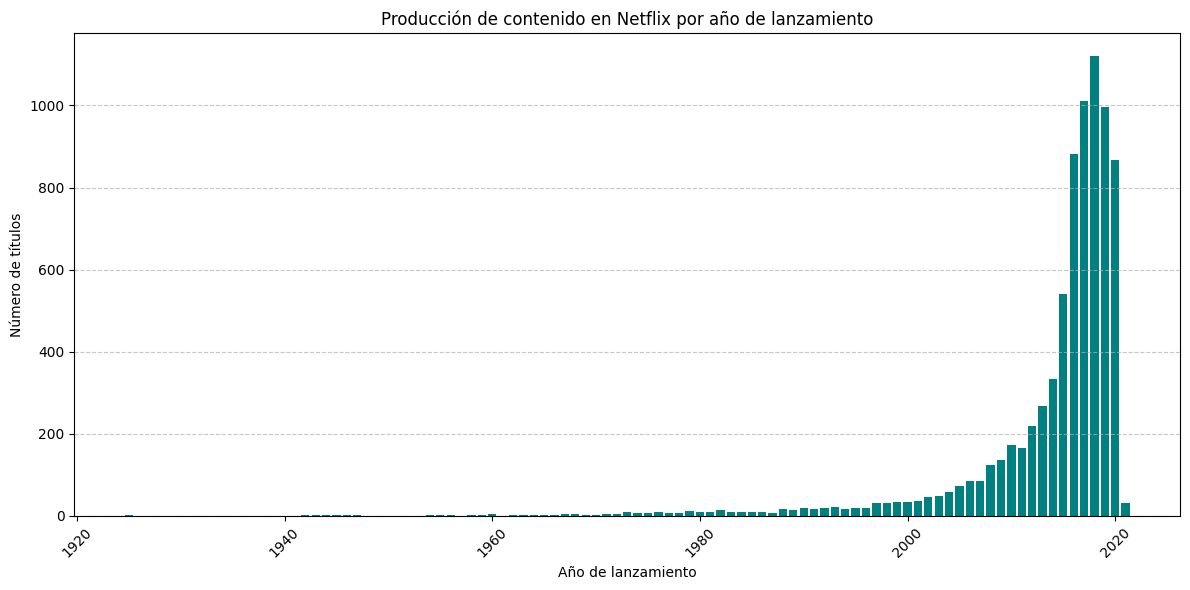

In [182]:
# Contar cuántos títulos se lanzaron por año
conteo_por_año = df['release_year'].value_counts().sort_index()

# Visualizar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(conteo_por_año.index, conteo_por_año.values, color='teal')
plt.title("Producción de contenido en Netflix por año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de títulos")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### ¿Qué países producen más contenido en Netflix?

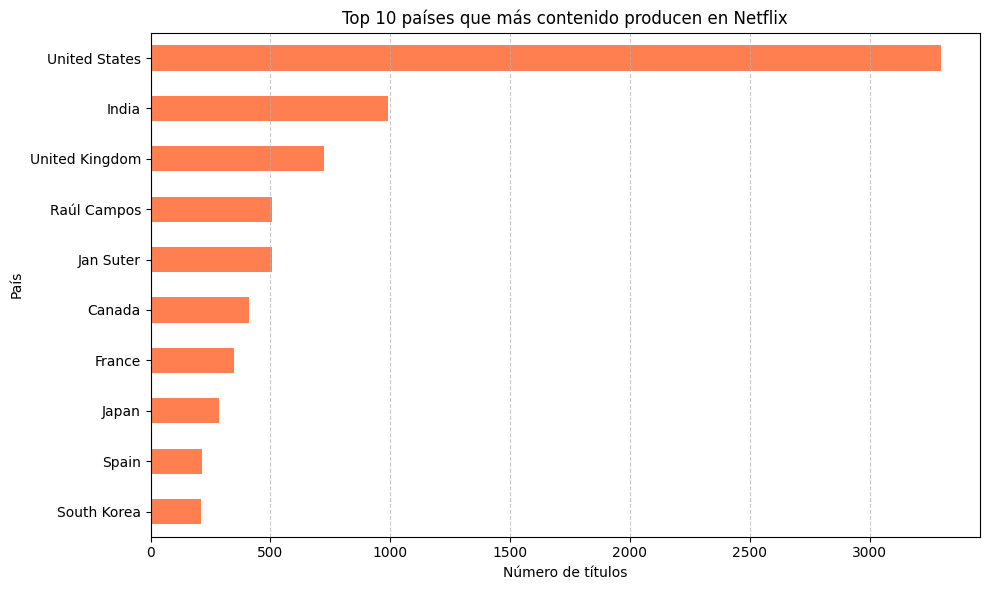

In [183]:
# Limpiar datos: separar múltiples países en diferentes filas
df_countries = df.dropna(subset=['country'])
df_countries = df_countries.assign(country=df_countries['country'].str.split(', '))
df_exploded = df_countries.explode('country')

# Contar cuántos títulos tiene cada país
conteo_paises = df_exploded['country'].value_counts().head(10)  # Top 10 países

# Visualizar el gráfico
plt.figure(figsize=(10, 6))
conteo_paises.plot(kind='barh', color='coral')
plt.title("Top 10 países que más contenido producen en Netflix")
plt.xlabel("Número de títulos")
plt.ylabel("País")
plt.gca().invert_yaxis()  # Mostrar el país con más títulos arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Distribución de duración por tipo (Movie vs TV Show).

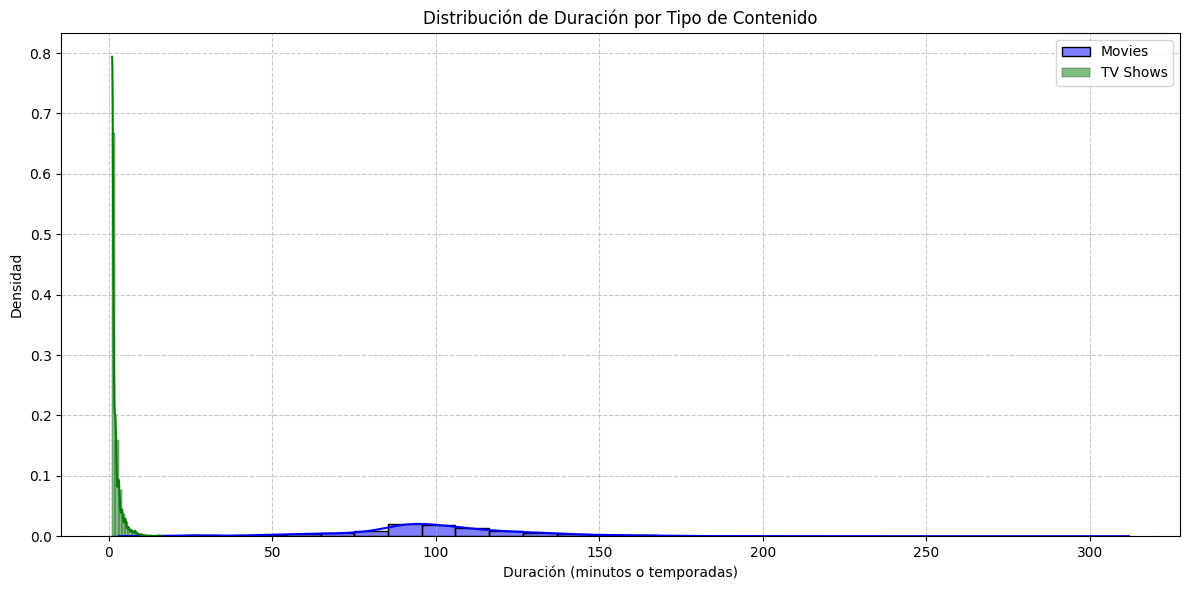

In [185]:
# Separar datasets por tipo
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Crear gráfico de distribución
plt.figure(figsize=(12, 6))

sns.histplot(movies['duration'], kde=True, bins=30, color='blue', label='Movies', stat='density')
sns.histplot(tv_shows['duration'], kde=True, bins=15, color='green', label='TV Shows', stat='density')

plt.title('Distribución de Duración por Tipo de Contenido')
plt.xlabel('Duración (minutos o temporadas)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### ¿Cuáles son los ratings más comunes según el tipo de contenido?

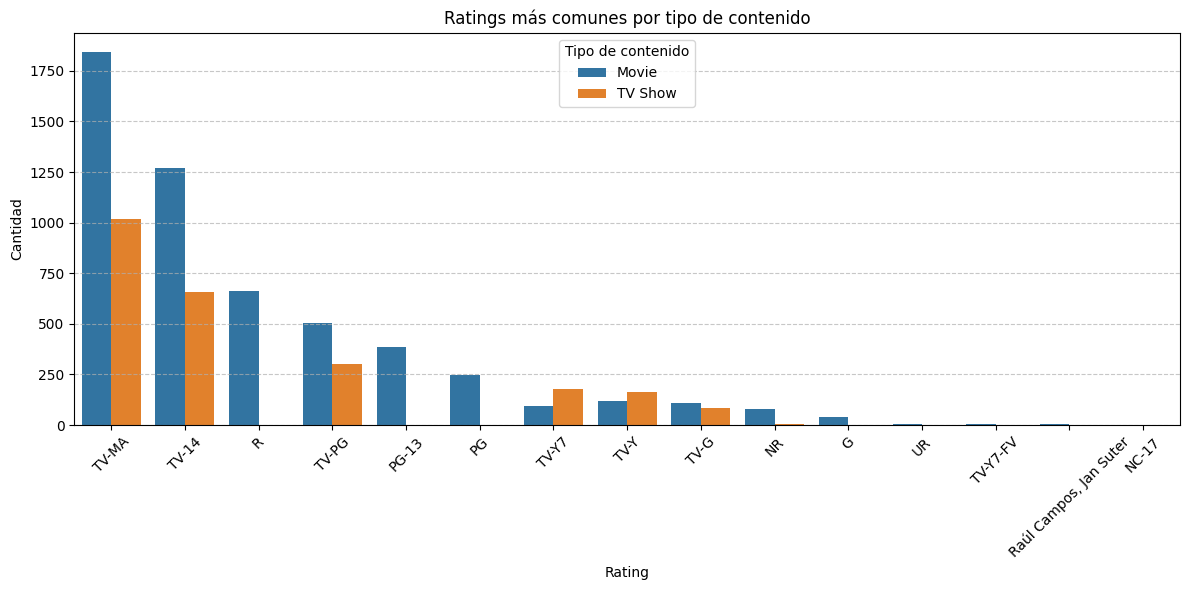

In [186]:
# Agrupar por tipo y rating, y contar
rating_counts = df.groupby(['type', 'rating']).size().reset_index(name='count')

# Ordenar para que el gráfico sea más claro
rating_counts = rating_counts.sort_values(by='count', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=rating_counts, x='rating', y='count', hue='type')

plt.title('Ratings más comunes por tipo de contenido')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de contenido')
plt.show()

### Top directores y actores más frecuentes.

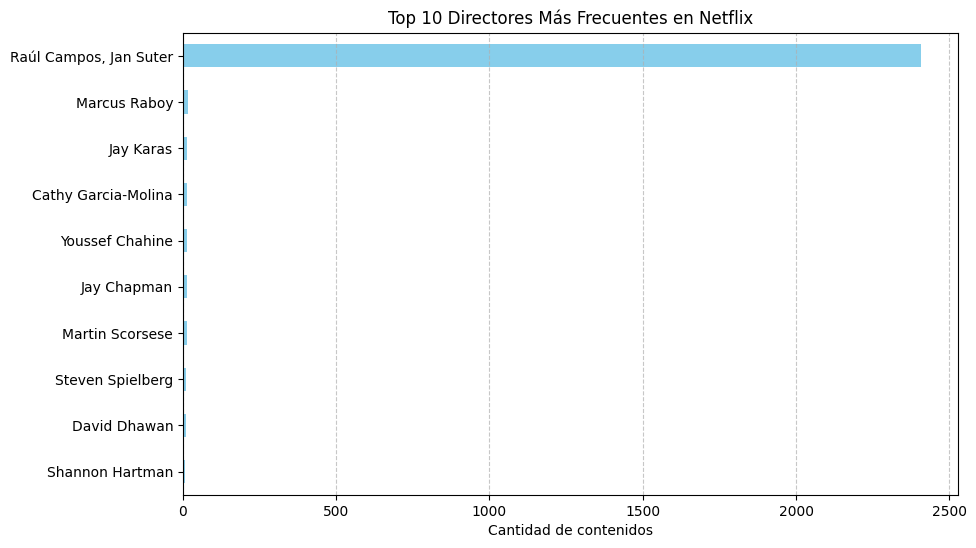

In [187]:
# Eliminar valores nulos de la columna 'director'
directores = df['director'].dropna()

# Contar frecuencia de cada director
top_directores = directores.value_counts().head(10)

# Visualizar
top_directores.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Directores Más Frecuentes en Netflix')
plt.xlabel('Cantidad de contenidos')
plt.gca().invert_yaxis()  # Poner el más frecuente arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

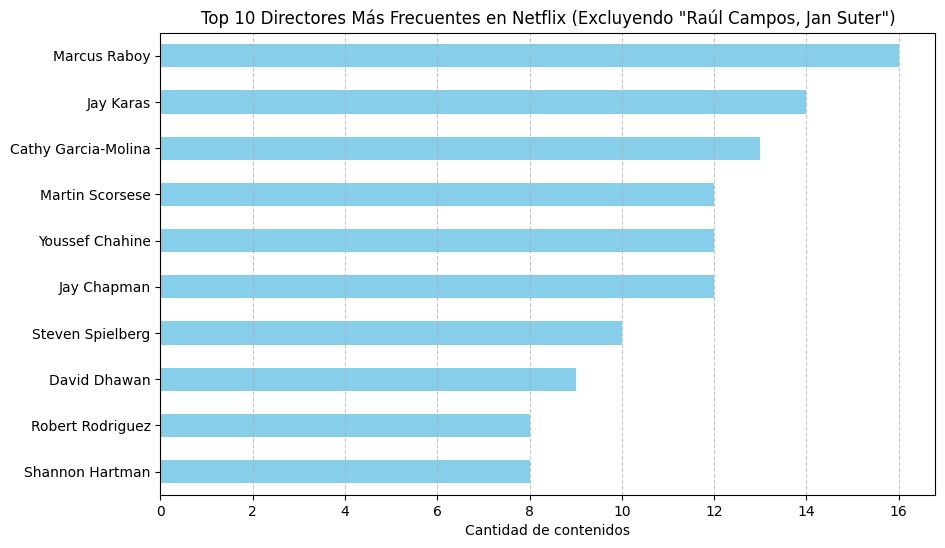

In [188]:
# Eliminar valores nulos y director "Raúl Campos, Jan Suter"
directores = df[df['director'] != 'Raúl Campos, Jan Suter']['director'].dropna()

# Contar frecuencia de cada director
top_directores = directores.value_counts().head(10)

# Visualizar
top_directores.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Directores Más Frecuentes en Netflix (Excluyendo "Raúl Campos, Jan Suter")')
plt.xlabel('Cantidad de contenidos')
plt.gca().invert_yaxis()  # Poner el más frecuente arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### ¿Qué géneros eran más populares en 2010 vs 2020?

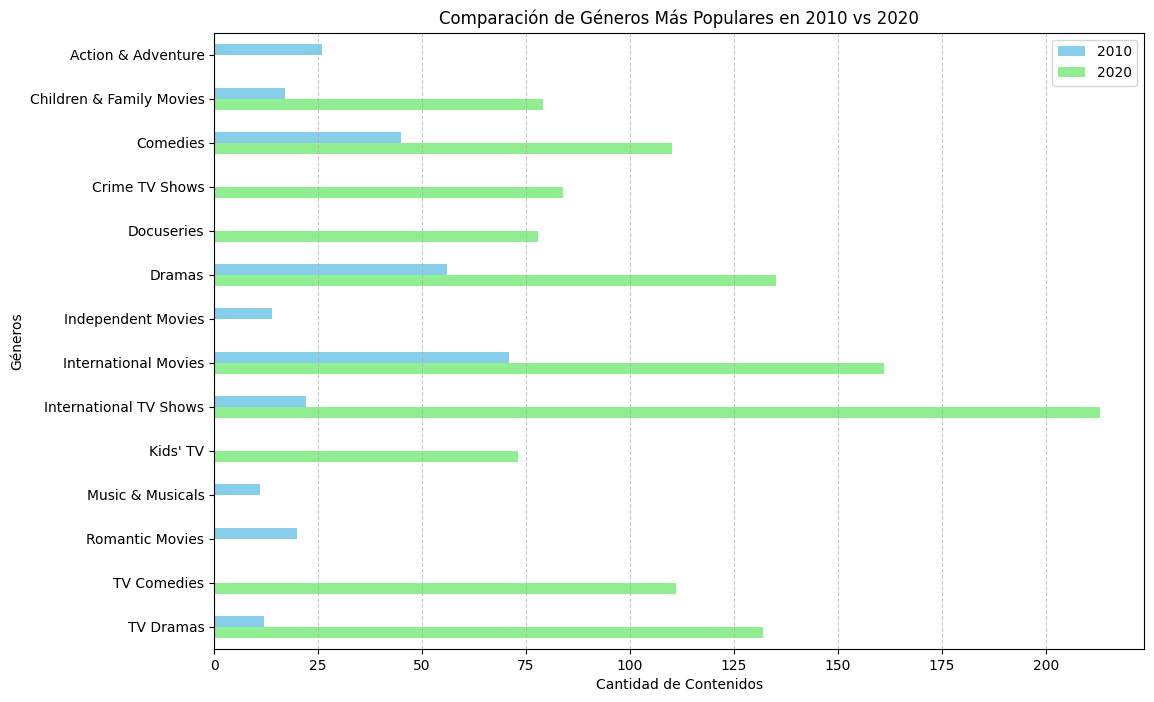

In [190]:
# Filtrar los datos para 2010 y 2020
df_2010 = df[df['release_year'] == 2010]
df_2020 = df[df['release_year'] == 2020]

# Separar los géneros en listas
generos_2010 = df_2010['genres'].str.split(', ').sum()
generos_2020 = df_2020['genres'].str.split(', ').sum()

# Contar la frecuencia de cada género
top_generos_2010 = pd.Series(generos_2010).value_counts().head(10)
top_generos_2020 = pd.Series(generos_2020).value_counts().head(10)

# Crear un DataFrame para la comparación
comparacion_generos = pd.DataFrame({
    '2010': top_generos_2010,
    '2020': top_generos_2020
}).fillna(0)

# Visualizar la comparación
comparacion_generos.plot(kind='barh', figsize=(12, 8), color=['skyblue', 'lightgreen'])
plt.title('Comparación de Géneros Más Populares en 2010 vs 2020')
plt.xlabel('Cantidad de Contenidos')
plt.ylabel('Géneros')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Análisis de la Popularidad por País

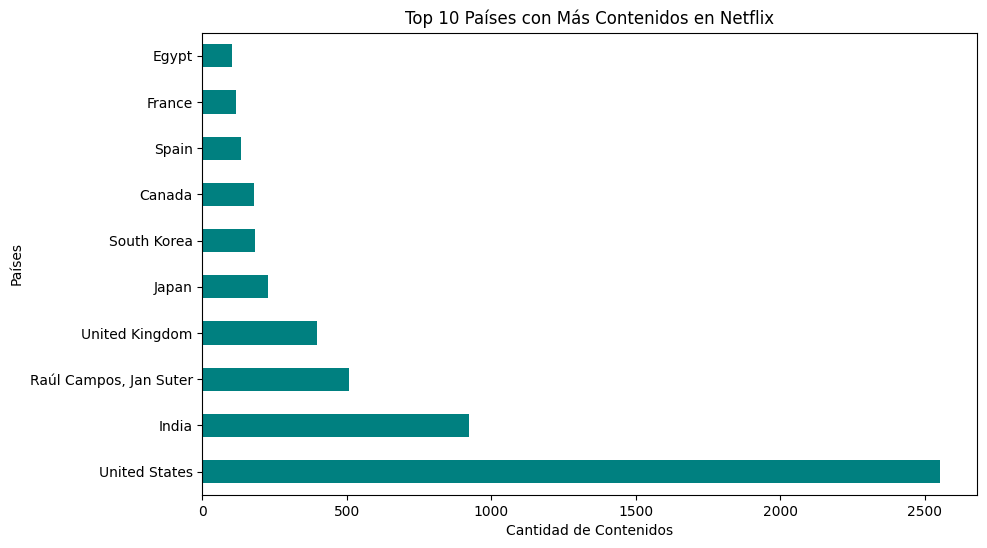

In [191]:
country_count = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
country_count.plot(kind='barh', color='teal')
plt.title('Top 10 Países con Más Contenidos en Netflix')
plt.xlabel('Cantidad de Contenidos')
plt.ylabel('Países')
plt.show()

## <span style="color:darkblue">Cuarto paso: análisis bivariante y multivariante. Y Representación gráfica</span>

Para las variables cuantitativas (duration, release_year), correlacion, regresion
Para las variables categorica nominal (type, rating, country), tablas cruzadas, chi-cuadrado.
Para las variables categoricas ordinal (low, medium, high): ANOVA, regresion ordinal. 

numérica VSa numérica: correlacion de Pearson, regresion lineal. Visual: scatterplot con linea de tendencia
numérica VSa categorica: correlacion de Spearman, regresion logistica. Visual

categorica Vs numerica: boxplot, test anova (para comparar medias entre grupos) Visual: sns.boxplot(x=2rating", y="duration", data=df)

categorica vs categorica: tablas de contingencia (frecuencia cruzada, test chi-cuadrado. Visual heatmap o grafico de barras aplicadas)


### <span style="color:gold"> Matriz de correlaciones </span>


In [158]:
corr_Pearson = df.select_dtypes(include='number').corr()
print(corr_Pearson)

              release_year  duration
release_year      1.000000 -0.240836
duration         -0.240836  1.000000


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14304\1923004271.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_c = df.corr()


<AxesSubplot: >

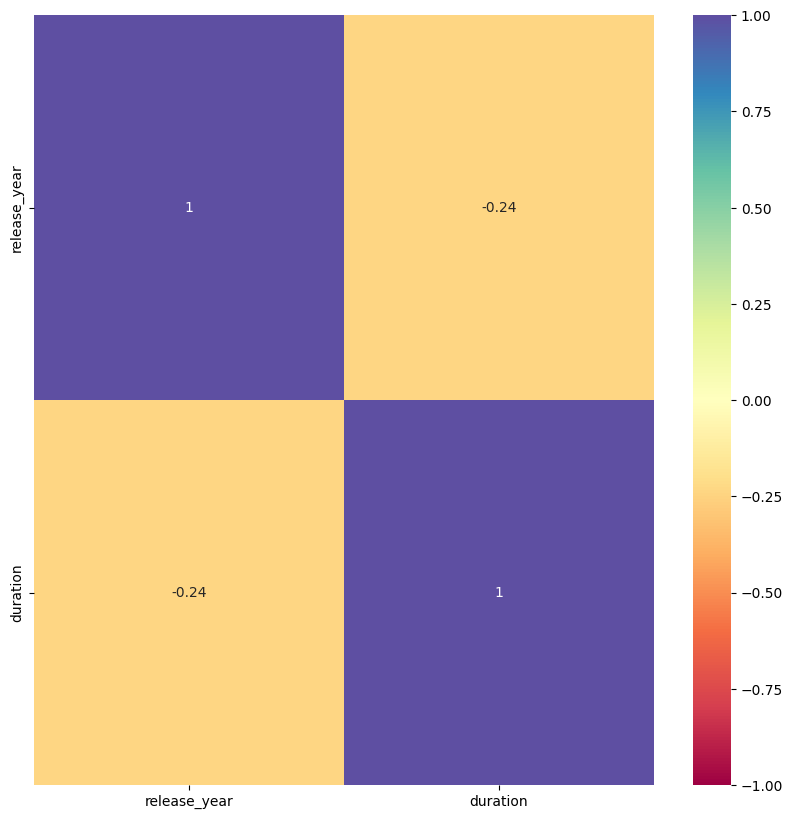

In [159]:
matriz_c = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matriz_c, annot=True,annot_kws={"size": 10}, vmin=-1.0, vmax=1.0,cmap="Spectral")

In [160]:
pd.crosstab(df_limpio['type'], df_limpio['rating'], normalize='index') * 100 #tabla cruzada entre categóricas

rating,G,NC-17,NR,PG,PG-13,R,"Raúl Campos, Jan Suter",TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,,
Movie,0.725312,0.055793,1.469221,4.59364,7.178724,12.330296,0.092989,23.656314,2.064348,34.312814,9.391854,2.175935,1.766784,0.092989,0.092989
TV Show,0.000000,0.000000,0.207469,0.00000,0.000000,0.082988,0.082988,27.344398,3.443983,42.240664,12.489627,6.763485,7.302905,0.041494,0.000000


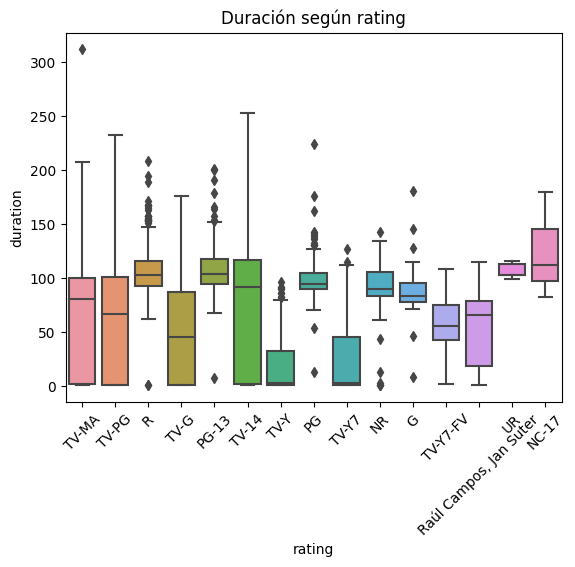

In [161]:
sns.boxplot(x='rating', y='duration', data=df)
plt.xticks(rotation=45)
plt.title("Duración según rating")
plt.show()

### <span style="color:gold"> Regresión simple </span>

In [162]:
#R.S. para las variables cuantitativas

# Variables dependiente (Y) y explicativa (X)
X = df['release_year'].values
Y = df['duration'].values

# Calcular la media de X y Y
x_mean = np.mean(X)
y_mean = np.mean(Y)

# Calcular beta1 (pendiente) y beta0 (intercepto)
beta1 = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)
beta0 = y_mean - beta1 * x_mean

print(f"Modelo ajustado: y = {beta0:.4f} + {beta1:.4f}x")

# Predicciones
Y_pred = beta0 + beta1 * X

# Calcular R²
ss_total = np.sum((Y - y_mean)**2)
ss_res = np.sum((Y - Y_pred)**2)
r2 = 1 - (ss_res / ss_total)

print(f"R²: {r2:.4f}")


Modelo ajustado: y = 2891.0247 + -1.4012x
R²: 0.0580


In [163]:
#solo el 5.8% de la variación en la duración puede explicarse por el año de lanzamiento.

C. Interpretación:
El coeficiente de release_year te dirá cómo cambia duration con cada incremento de un año de release_year.

El valor p te ayudará a determinar si la relación es estadísticamente significativa (si es < 0.05, suele ser significativa).



. Interpretación:
Coeficientes: Como antes, los coeficientes indican cuánto cambia la variable dependiente con el cambio en cada variable independiente.

R-cuadrado: Mide la cantidad de variación de la variable dependiente explicada por las variables independientes.

### <span style="color:gold"> Tablas cruzadas y prueba de chi cuadrado </span>

conclusiones: 
Hay una relación significativa entre las variables type, rating y country. Esto significa que el tipo de contenido (película o programa de TV), la clasificación de la película/serie y el país están interrelacionados.

Sin embargo, la distribución de los datos podría no ser ideal para la prueba de Chi-cuadrado, ya que algunas celdas tienen frecuencias esperadas muy bajas. Esto podría influir en la precisión de los resultados, por lo que una prueba de exactitud de Fisher o el ajuste de los datos podría ser necesario si hay muchas combinaciones raras de valores.

Estadístico Chi-cuadrado: 21863.69

Este valor es muy alto, lo que indica que hay una diferencia significativa entre las frecuencias observadas y las esperadas. Es decir, las variables no son independientes, lo que sugiere que están asociadas de alguna manera.

Valor p: 1.53e-168

Este valor p es extremadamente pequeño, mucho menor que el umbral común de 0.05, lo que confirma que hay una relación estadísticamente significativa entre las variables. Es decir, podemos rechazar la hipótesis nula de independencia entre type, rating, y country.

Grados de libertad: 16344

Es el número de grados de libertad de la prueba, que depende del número de categorías en cada una de las variables.

Frecuencias esperadas:

Este es el conjunto de frecuencias que esperaríamos ver si las variables fueran independientes. Dado que los valores esperados son muy pequeños en algunas celdas (por ejemplo, valores como 0.0001), eso podría indicar que la prueba de Chi-cuadrado no es del todo confiable en celdas con tan pocos datos. Esto puede ser un problema si algunas combinaciones de type, rating y country tienen pocos casos.

In [164]:
#Variables categóricas "type", "rating", "country". 

#Las películas están asociadas fuertemente con ratings de cine (G, PG, R, etc.), pero también tienen muchas con ratings de televisión como TV-14 o TV-MA (posiblemente por distribución en plataformas de streaming).

#Los TV Shows, como era de esperarse, tienen casi exclusivamente ratings televisivos.
#El dataset muestra una clara relación entre el tipo de contenido y el sistema de clasificación.

In [165]:
pd.crosstab(df_limpio['type'], df_limpio['rating'])


rating,G,NC-17,NR,PG,PG-13,R,"Raúl Campos, Jan Suter",TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,,
Movie,39,3,79,247,386,663,5,1272,111,1845,505,117,95,5,5
TV Show,0,0,5,0,0,2,2,659,83,1018,301,163,176,1,0


In [166]:
pd.crosstab(index=[df_limpio['type'], df_limpio['rating']],
            columns=df_limpio['country'])


country                         Argentina  \
type    rating                              
Movie   G                               0   
        NC-17                           0   
        NR                              2   
        PG                              0   
        PG-13                           0   
        R                               1   
        Raúl Campos, Jan Suter          0   
        TV-14                           5   
        TV-G                            1   
        TV-MA                          23   
        TV-PG                           2   
        TV-Y                            0   
        TV-Y7                           0   
        TV-Y7-FV                        0   
        UR                              0   
TV Show NR                              0   
        R                               0   
        Raúl Campos, Jan Suter          0   
        TV-14                           2   
        TV-G                            0   
        TV-MA                          11   
        TV-PG                           1   
        TV-Y                            2   
        TV-Y7                           0   
        TV-Y7-FV                        0   

country                         Argentina, Brazil, France, Poland, Germany, Denmark  \
type    rating                                                                        
Movie   G                                                                       0     
        NC-17                                                                   0     
        NR                                                                      0     
        PG                                                                      0     
        PG-13                                                                   0     
        R                                                                       0     
        Raúl Campos, Jan Suter                                                  0     
        TV-14                                                                   1     
        TV-G                                                                    0     
        TV-MA                                                                   0     
        TV-PG                                                                   0     
        TV-Y                                                                    0     
        TV-Y7                                                                   0     
        TV-Y7-FV                                                                0     
        UR                                                                      0     
TV Show NR                                                                      0     
        R                                                                       0     
        Raúl Campos, Jan Suter                                                  0     
        TV-14                                                                   0     
        TV-G                                                                    0     
        TV-MA                                                                   0     
        TV-PG                                                                   0     
        TV-Y                                                                    0     
        TV-Y7                                                                   0     
        TV-Y7-FV                                                                0     

country                         Argentina, Chile  Argentina, Chile, Peru  \
type    rating                                                             
Movie   G                                      0                       0   
        NC-17                                  0                       0   
        NR                                     0                       0   
        PG                                     0      

In [167]:
tabla = pd.pivot_table(df_limpio, 
                       index=['type', 'rating'], 
                       columns='country', 
                       aggfunc='size', 
                       fill_value=0)



In [168]:
#Chi cuadrado

import scipy.stats as stats

# Paso 1: Crear la tabla cruzada entre las variables 'type', 'rating' y 'country'
tabla_cruzada = pd.crosstab(index=[df_limpio['type'], df_limpio['rating']], columns=df_limpio['country'])

# Paso 2: Realizar la prueba de Chi-cuadrado
chi2, p_valor, dof, expected = stats.chi2_contingency(tabla_cruzada)

# Mostrar los resultados
print("Estadístico Chi-cuadrado:", chi2)
print("Valor p:", p_valor)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:")
print(expected)

# Paso 3: Interpretación
if p_valor < 0.05:
    print("Hay una relación estadísticamente significativa entre las variables.")
else:
    print("No hay relación estadísticamente significativa entre las variables.")

Estadístico Chi-cuadrado: 21863.68711435848
Valor p: 1.5343521858714733e-168
Grados de libertad: 16344
Frecuencias esperadas:
[[2.50417362e-01 5.00834725e-03 5.00834725e-03 ... 2.50417362e-02
  5.00834725e-03 5.00834725e-03]
 [1.92628740e-02 3.85257480e-04 3.85257480e-04 ... 1.92628740e-03
  3.85257480e-04 3.85257480e-04]
 [5.07255683e-01 1.01451137e-02 1.01451137e-02 ... 5.07255683e-02
  1.01451137e-02 1.01451137e-02]
 ...
 [1.04661616e+00 2.09323231e-02 2.09323231e-02 ... 1.04661616e-01
  2.09323231e-02 2.09323231e-02]
 [1.13008861e+00 2.26017722e-02 2.26017722e-02 ... 1.13008861e-01
  2.26017722e-02 2.26017722e-02]
 [6.42095801e-03 1.28419160e-04 1.28419160e-04 ... 6.42095801e-04
  1.28419160e-04 1.28419160e-04]]
Hay una relación estadísticamente significativa entre las variables.


In [169]:
#visualizacion de resultados

from sklearn.linear_model import LinearRegression
import numpy as np

# Definir X (variables independientes) y Y (variable dependiente)
X = df_limpio[['release_year']]  # Una o más variables predictoras
Y = df_limpio['duration']  # Variable objetivo


In [170]:
#ajustar modelo

# Crear el modelo
modelo_lr = LinearRegression()

# Ajustar el modelo
modelo_lr.fit(X, Y)

# Ver los coeficientes
print(f"Coeficiente: {modelo_lr.coef_}")
print(f"Intercepto: {modelo_lr.intercept_}")


Coeficiente: [-1.40118987]
Intercepto: 2891.0247009666623


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


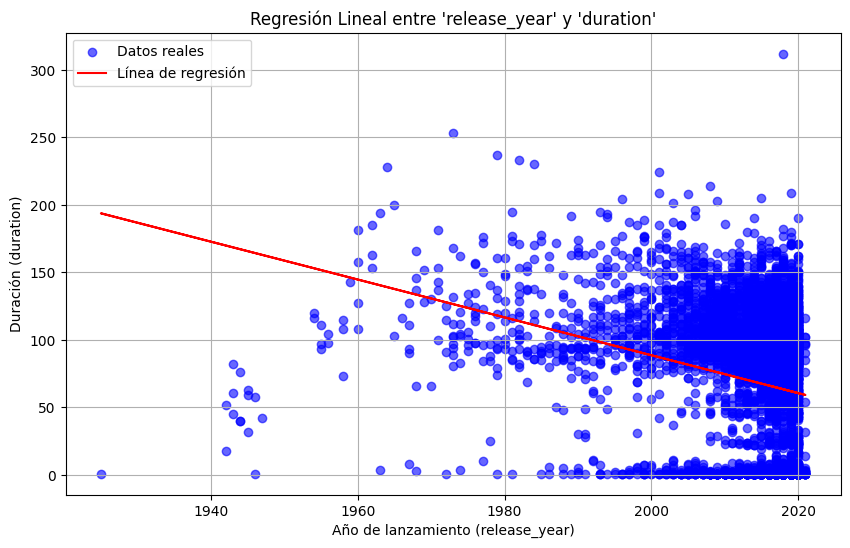

In [175]:
#visualizar los resultados
Y_pred = modelo_lr.predict(X_plot.values.reshape(-1, 1))

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_plot, Y_plot, color='blue', alpha=0.6, label='Datos reales')
plt.plot(X_plot, Y_pred, color='red', label='Línea de regresión')
plt.title("Regresión Lineal entre 'release_year' y 'duration'")
plt.xlabel('Año de lanzamiento (release_year)')
plt.ylabel('Duración (duration)')
plt.legend()
plt.grid(True)
plt.show()

### <span style="color:gold"> ANOVA: Análisis de las varianzas </span>

Conclusión: 

In [176]:
# Paso 1: Convertir la columna 'duration' a numérica (extraer solo los números)
df_limpio['duration'] = df_limpio['duration'].str.extract('(\d+)').astype(float)

# Verificar que la conversión fue exitosa
df_limpio['duration'].head()

0      4.0
1    143.0
2    124.0
3     90.0
4      1.0
Name: duration, dtype: float64

In [177]:
def clasificar_duration(duration):
    if duration < 60:
        return 'low'
    elif 60 <= duration <= 120:
        return 'medium'
    else:
        return 'high'

# Paso 2: Aplicar la función de clasificación a la columna 'duration'
df_limpio['duration_category'] = df_limpio['duration'].apply(clasificar_duration)

# Verificar que la clasificación fue exitosa
df_limpio[['duration', 'duration_category']].head()

,duration,duration_category
0,4.0,low
1,143.0,high
2,124.0,high
3,90.0,medium
4,1.0,low


In [178]:
# Paso 2: Realizar el análisis de varianza (ANOVA) sobre 'duration' por los grupos en 'duration_category'
f_stat, p_valor = stats.f_oneway(
    df_limpio[df_limpio['duration_category'] == 'low']['duration'],
    df_limpio[df_limpio['duration_category'] == 'medium']['duration'],
    df_limpio[df_limpio['duration_category'] == 'high']['duration']
)

# Paso 3: Mostrar los resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_valor)

# Paso 4: Interpretación
if p_valor < 0.05:
    print("Hay diferencias significativas en la duración entre los grupos 'low', 'medium' y 'high'.")
else:
    print("No hay diferencias significativas en la duración entre los grupos 'low', 'medium' y 'high'.")



Estadístico F: 39787.39676749603
Valor p: 0.0
Hay diferencias significativas en la duración entre los grupos 'low', 'medium' y 'high'.


In [180]:
# Paso 1: Asegurarse de que 'duration' sea numérico y manejar valores NaN
df_limpio['duration'] = pd.to_numeric(df_limpio['duration'], errors='coerce')

# Paso 2: Eliminar las filas con valores NaN en 'duration'
df_limpio = df_limpio.dropna(subset=['duration'])

# Paso 3: Realizar el análisis ANOVA con 'rating' y 'duration'
f_stat, p_valor = stats.f_oneway(
    df_limpio[df_limpio['rating'] == 'low']['duration'],
    df_limpio[df_limpio['rating'] == 'medium']['duration'],
    df_limpio[df_limpio['rating'] == 'high']['duration']
)

# Mostrar los resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_valor)

# Interpretación
if p_valor < 0.05:
    print("Hay diferencias significativas en la duración entre los grupos de rating ('low', 'medium', 'high').")
else:
    print("No hay diferencias significativas en la duración entre los grupos de rating ('low', 'medium', 'high').")


Estadístico F: nan
Valor p: nan
No hay diferencias significativas en la duración entre los grupos de rating ('low', 'medium', 'high').


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_stats_py.py:3872: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [181]:
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


# <span style="color:darkblue"> Data science </span>

# <span style="color:darkblue"> Conclusiones </span>